## Industrial Machines Malfunction Detection using Deep Learning
### Valves, Slide-rails and Industrial Fans

#### Amplitude Envelope, RMS-energy

- Rajesh Siraskar | 27-May-2021

#### Basics
- [DSP: Basics](https://support.ircam.fr/docs/AudioSculpt/3.0/co/Sampling.html) - Aliasing, Nyquist Freq.,lowest detectable frequency
- Nyquist Frequency and the relation between sampling-rate and max. frequency
    - $F_{max} = Sampling Rate/2$
    - $F_{max}$ is called _Nyquist Frequency_

#### Time Domain Features
- Amplitude Envelope
- RMS Energy

In [1]:
import warnings
import os
from pathlib import Path
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import random
from matplotlib import pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Constants
PATH = 'audio_files/'
duration = 4   # Seconds of waveform to use
y_lim = 0.035  # Max. amplitude for plotting

In [3]:
# Paths: industrial_fan_abnormal/; slide_rail_abnormal; valve_abnormal; *_normal/
# File:  00000000 - 00000099 
fan_nsound  = f"{PATH}industrial_fan_normal/{random.randint(0, 99):08d}.wav"
fan_asound  = f"{PATH}industrial_fan_abnormal/{random.randint(0, 99):08d}.wav"
rail_nsound = f"{PATH}slide_rail_normal/{random.randint(0, 99):08d}.wav"
rail_asound = f"{PATH}slide_rail_abnormal/{random.randint(0, 99):08d}.wav"

In [4]:
ipd.Audio(fan_asound)

In [5]:
# Load audio files
waveform1, sample_rate  = librosa.load(fan_nsound, duration=duration)
waveform2, sample_rate2 = librosa.load(fan_asound, duration=duration)
waveform3, sample_rate3 = librosa.load(rail_nsound, duration=duration)
waveform4, sample_rate4 = librosa.load(rail_asound, duration=duration)

# Create arrays
wfs = [waveform1, waveform2, waveform3, waveform4]
titles = ['Industrial Fan Normal', 'Industrial Fan Abnormal', 'Slide-rail Normal', 'Slide-rail Abnormal']

In [6]:
# Sample rate
print('Sampling rate:\t\t', sample_rate)
duration = 1/sample_rate
print('Duration of ONE sample:\t %0.6f seconds' % duration)
print('Duration of full audio:\t %4.2f seconds' % (duration*len(waveform1)))

Sampling rate:		 22050
Duration of ONE sample:	 0.000045 seconds
Duration of full audio:	 4.00 seconds


In [7]:
def plot_waveforms(waveform=None, title="x", y_lim=0.5, row=0, col=0,  n_plot=0):
    plt.subplot(row, col, n_plot)
    librosa.display.waveplot(waveform, alpha=0.5)
    plt.xticks(fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.title(title, fontsize=24)
    plt.ylim((-y_lim,y_lim))

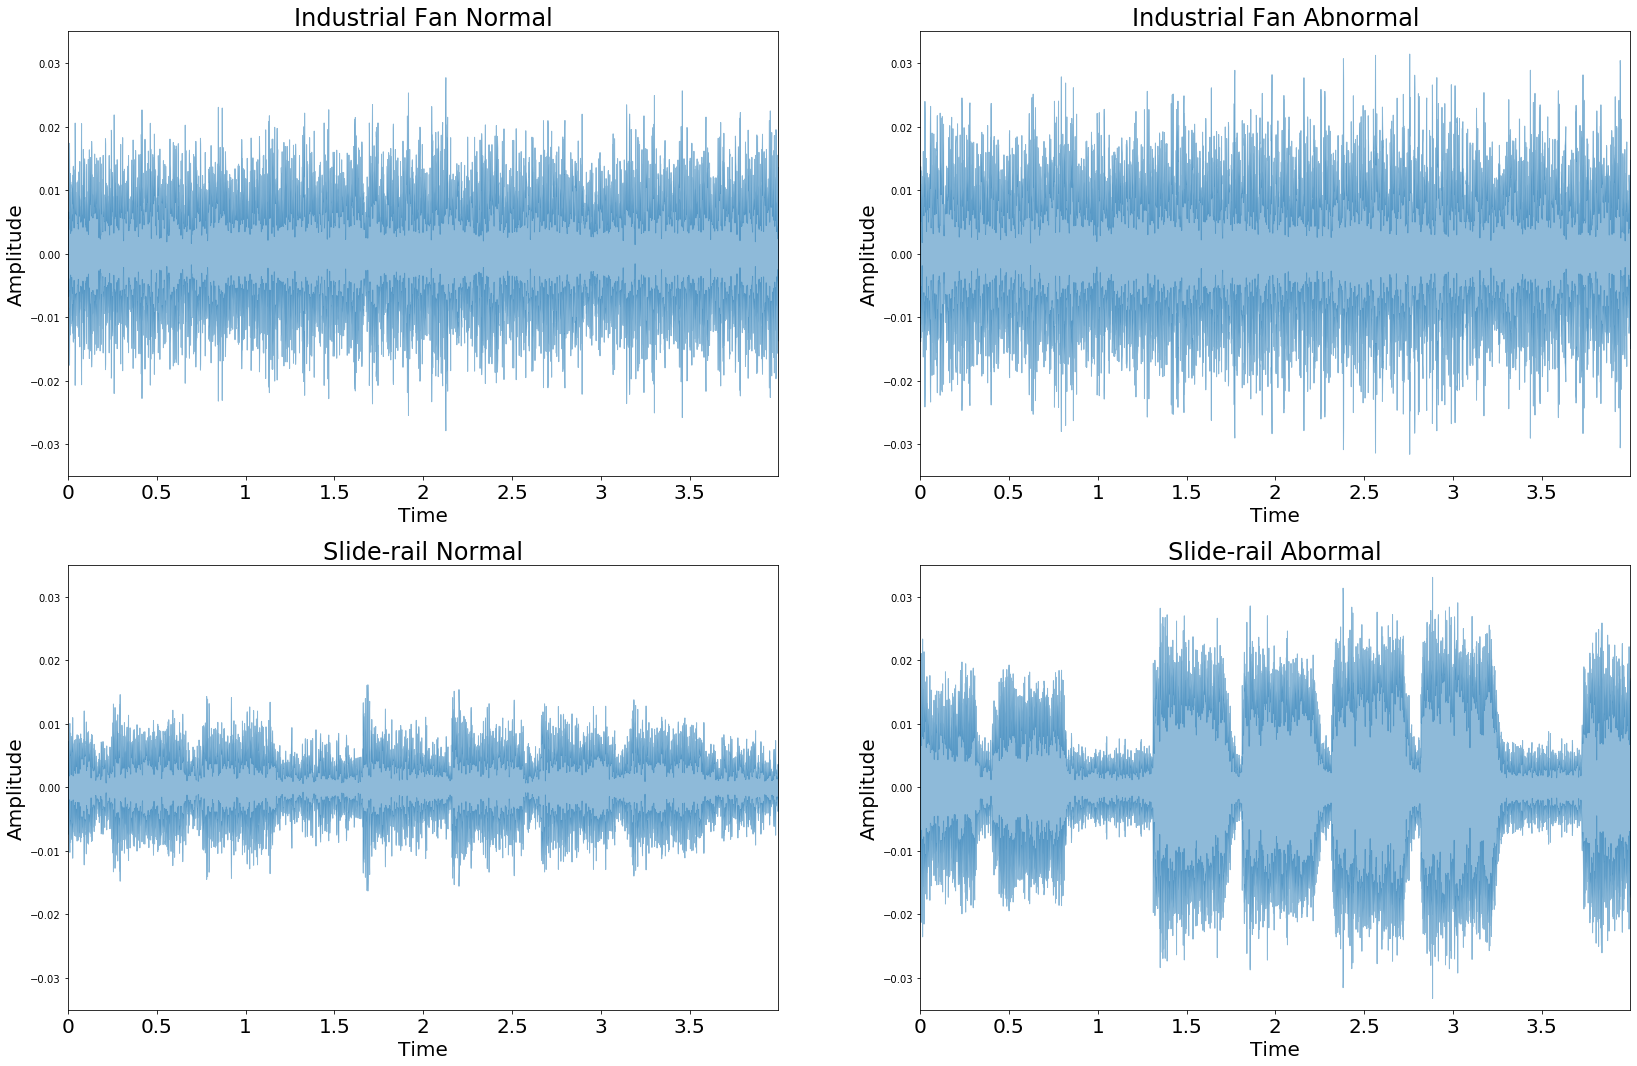

In [8]:
plt.figure(figsize=(28, 18))
plot_waveforms(waveform=waveform1, title='Industrial Fan Normal', y_lim=y_lim, row=2, col=2, n_plot=1) 
plot_waveforms(waveform=waveform2, title='Industrial Fan Abnormal', y_lim=y_lim, row=2, col=2, n_plot=2)  
plot_waveforms(waveform=waveform3, title='Slide-rail Normal', y_lim=y_lim, row=2, col=2, n_plot=3)  
plot_waveforms(waveform=waveform4, title='Slide-rail Abormal', y_lim=y_lim, row=2, col=2, n_plot=4)  

### Amplitude Envelope

In [9]:
def amplitude_envelope (signal, frame_size, hop_length):    
    return np.array([max(signal[t:t+frame_size]) for t in range (0, signal.size, hop_length)])

In [10]:
def plot_superimposed_waveforms(waveform=None, superimposed_waveform=None, title="x",
                                y_lim=0.5, row=0, col=0,  n_plot=0):
    
    # Compute the time length for AEs
    frames = range(len(superimposed_waveform.size))
    T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
    
    plt.subplot(row, col, n_plot)
    librosa.display.waveplot(waveform, alpha=0.5)
    plt.plot(T, superimposed_waveform, color='r')
    plt.xticks(fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.title(title, fontsize=24)
    plt.ylim((-y_lim,y_lim))

In [11]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

AE_waveform1 = amplitude_envelope(waveform1, FRAME_SIZE, HOP_LENGHT)
AE_waveform2 = amplitude_envelope(waveform2, FRAME_SIZE, HOP_LENGHT)
AE_waveform3 = amplitude_envelope(waveform3, FRAME_SIZE, HOP_LENGHT)
AE_waveform4 = amplitude_envelope(waveform4, FRAME_SIZE, HOP_LENGHT)

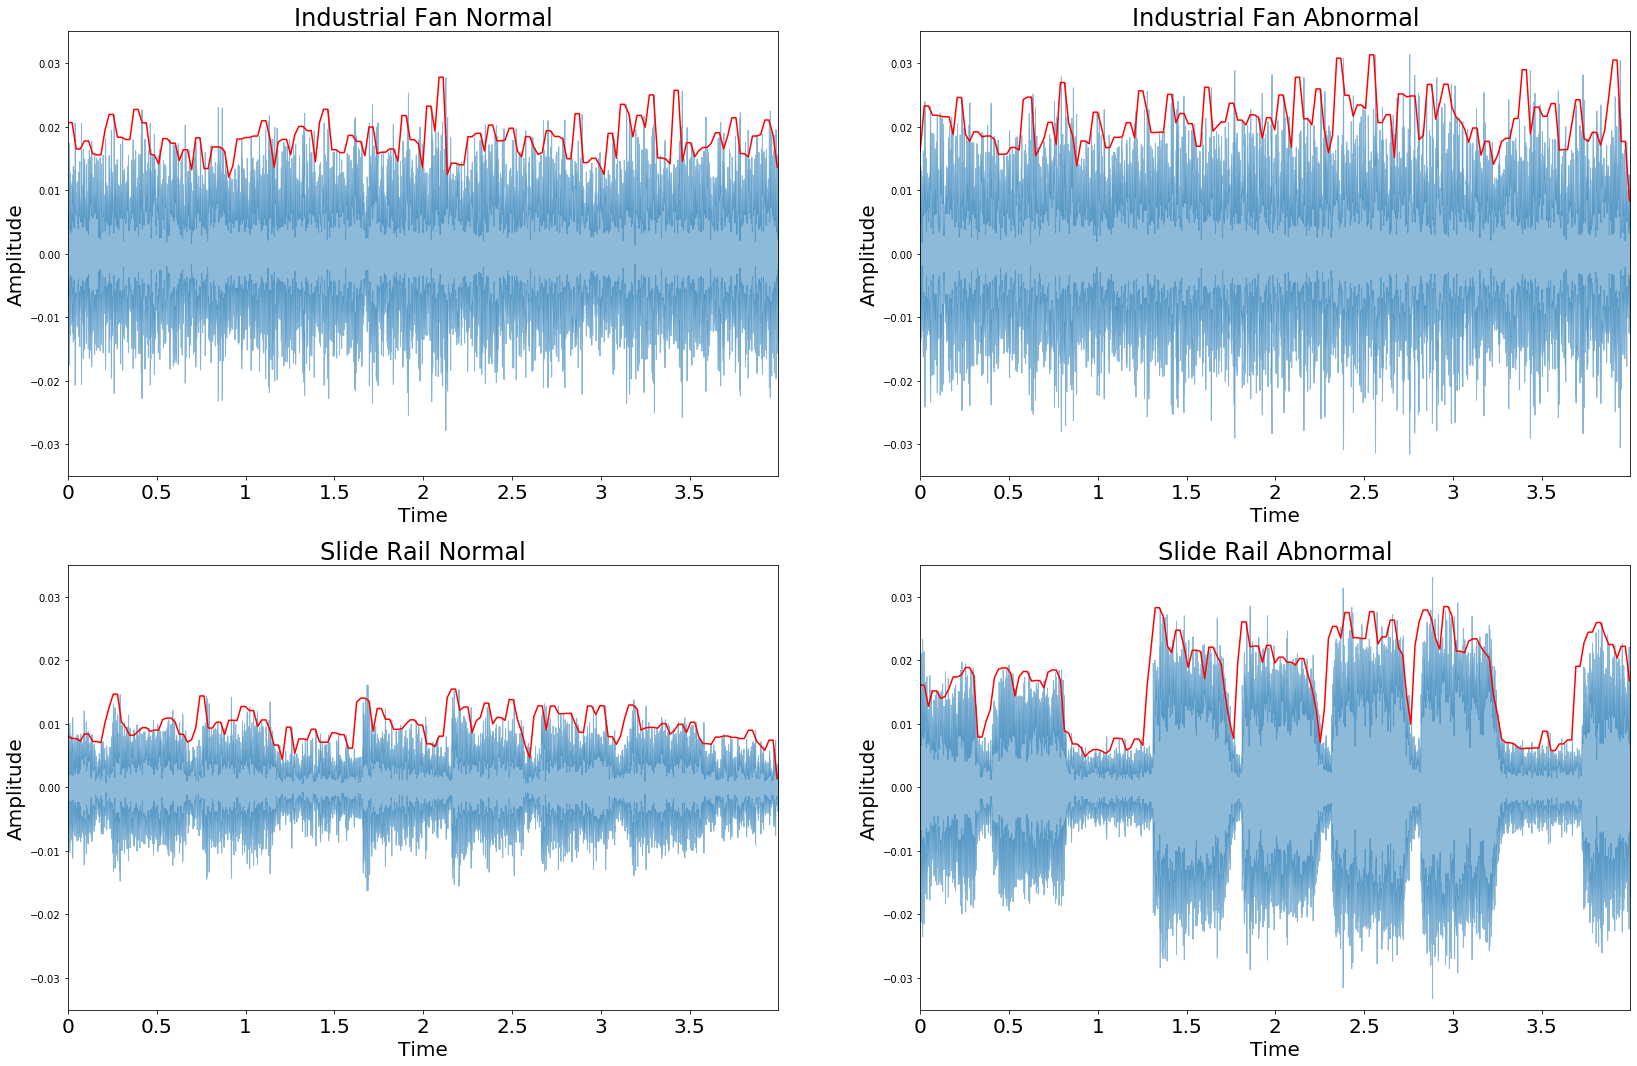

In [12]:
# Visualize the 4 waveforms
plt.figure(figsize=(28, 18))

# Pass the waveform and the AE_waveform to plotting function
plot_superimposed_waveforms(waveform=waveform1, superimposed_waveform=AE_waveform1,
                            titile='Industrial Fan Normal', y_lim=y_lim, row=2, col=2, n_plot=1)

plot_superimposed_waveforms(waveform=waveform2, superimposed_waveform=AE_waveform2, 
                            titile='Industrial Fan Abnormal', y_lim=y_lim, row=2, col=2, n_plot=2) 

plot_superimposed_waveforms(waveform=waveform3, superimposed_waveform=AE_waveform3, 
                            titile='Slide Rail Normal', y_lim=y_lim, row=2, col=2, n_plot=3)

plot_superimposed_waveforms(waveform=waveform4, superimposed_waveform=AE_waveform4, 
                            titile='Slide Rail Abnormal', y_lim=y_lim, row=2, col=2, n_plot=4)

RMS Energy
==============================================

Note: librosa rms funciton returns shape of (xxx, 1) and need to take rms[0] to plot values

In [13]:
def rms_energy(signal, frame_size, hop_length):
    rmse = []
    return np.array([np.sqrt(np.mean(np.power(signal[t:t+frame_size],2))) for t in range (0, signal.size, hop_length)])

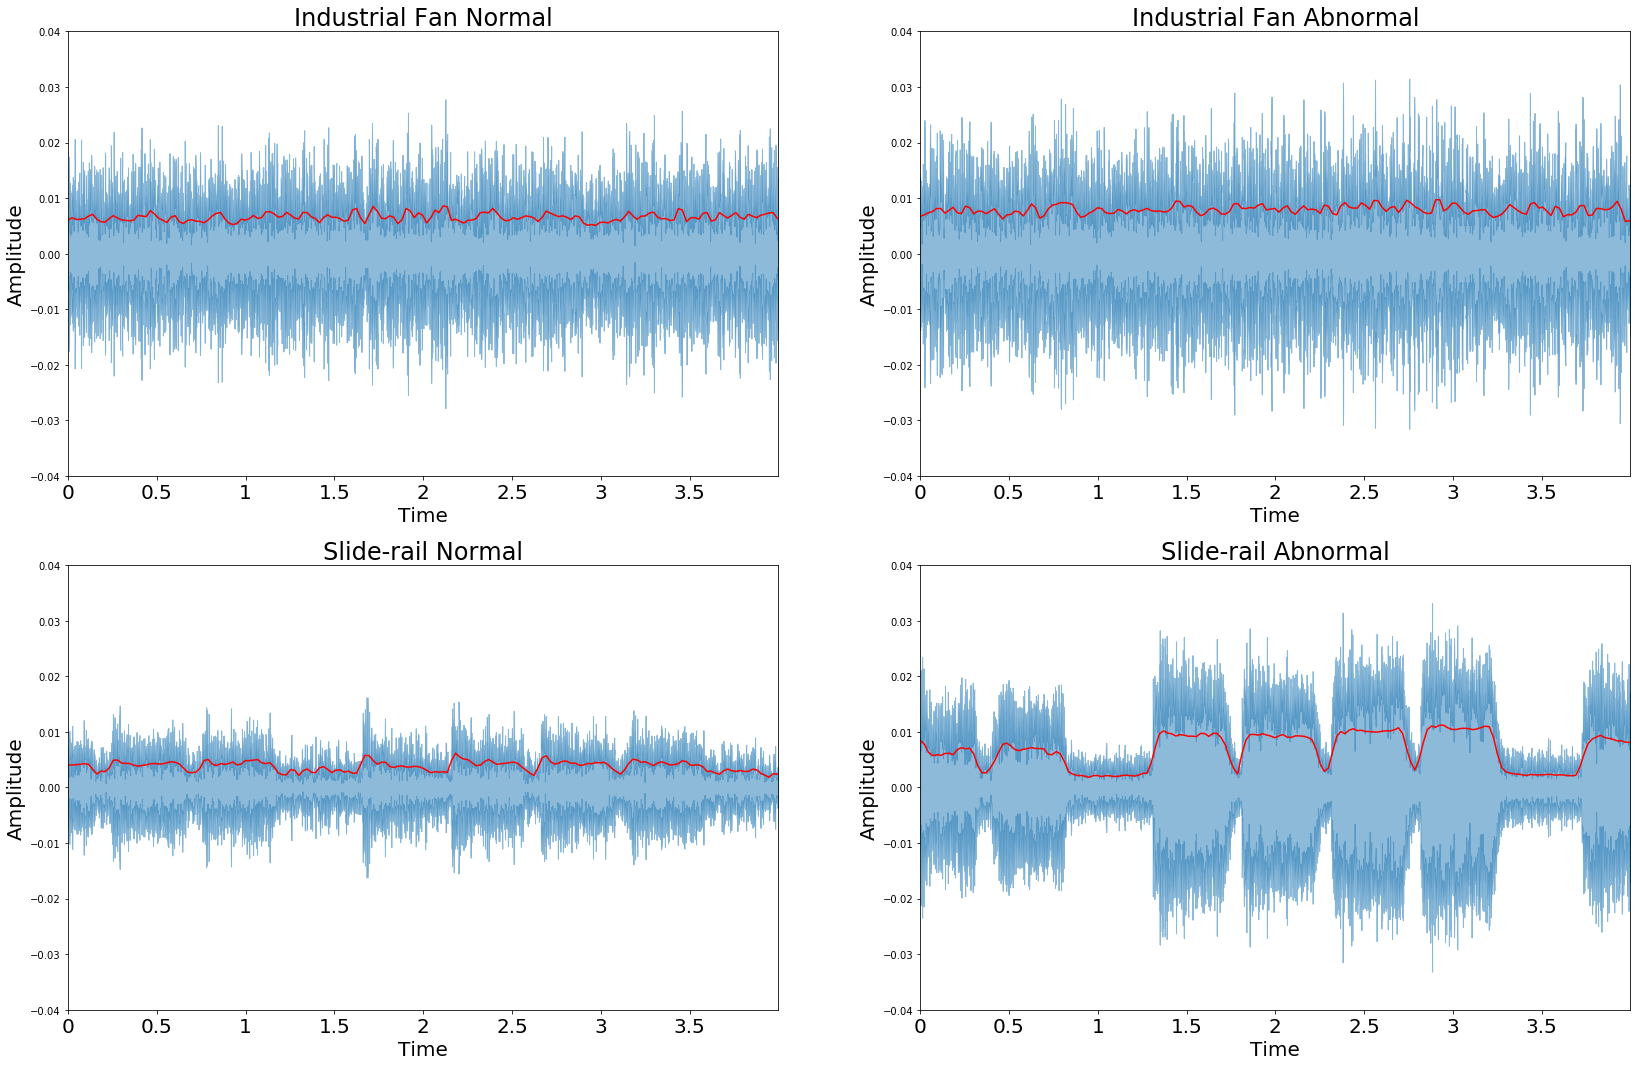

In [55]:
FRAME_SIZE = 1024
HOP_LENGHT = 512
y_lim = 0.04

# RMS energy for Waveforms 
rms_wfs = [librosa.feature.rms(wf, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0] 
           for wf in wfs]

# Visualize the 4 waveforms
plt.figure(figsize=(28, 18))
for n in range(len(wfs)):
    plot_superimposed_waveforms(waveform=wfs[n], superimposed_waveform=rms_wfs[n], 
                                title=titles[n], y_lim=y_lim, row=2, col=2, n_plot=n+1)

Zero Crossing Rate
================

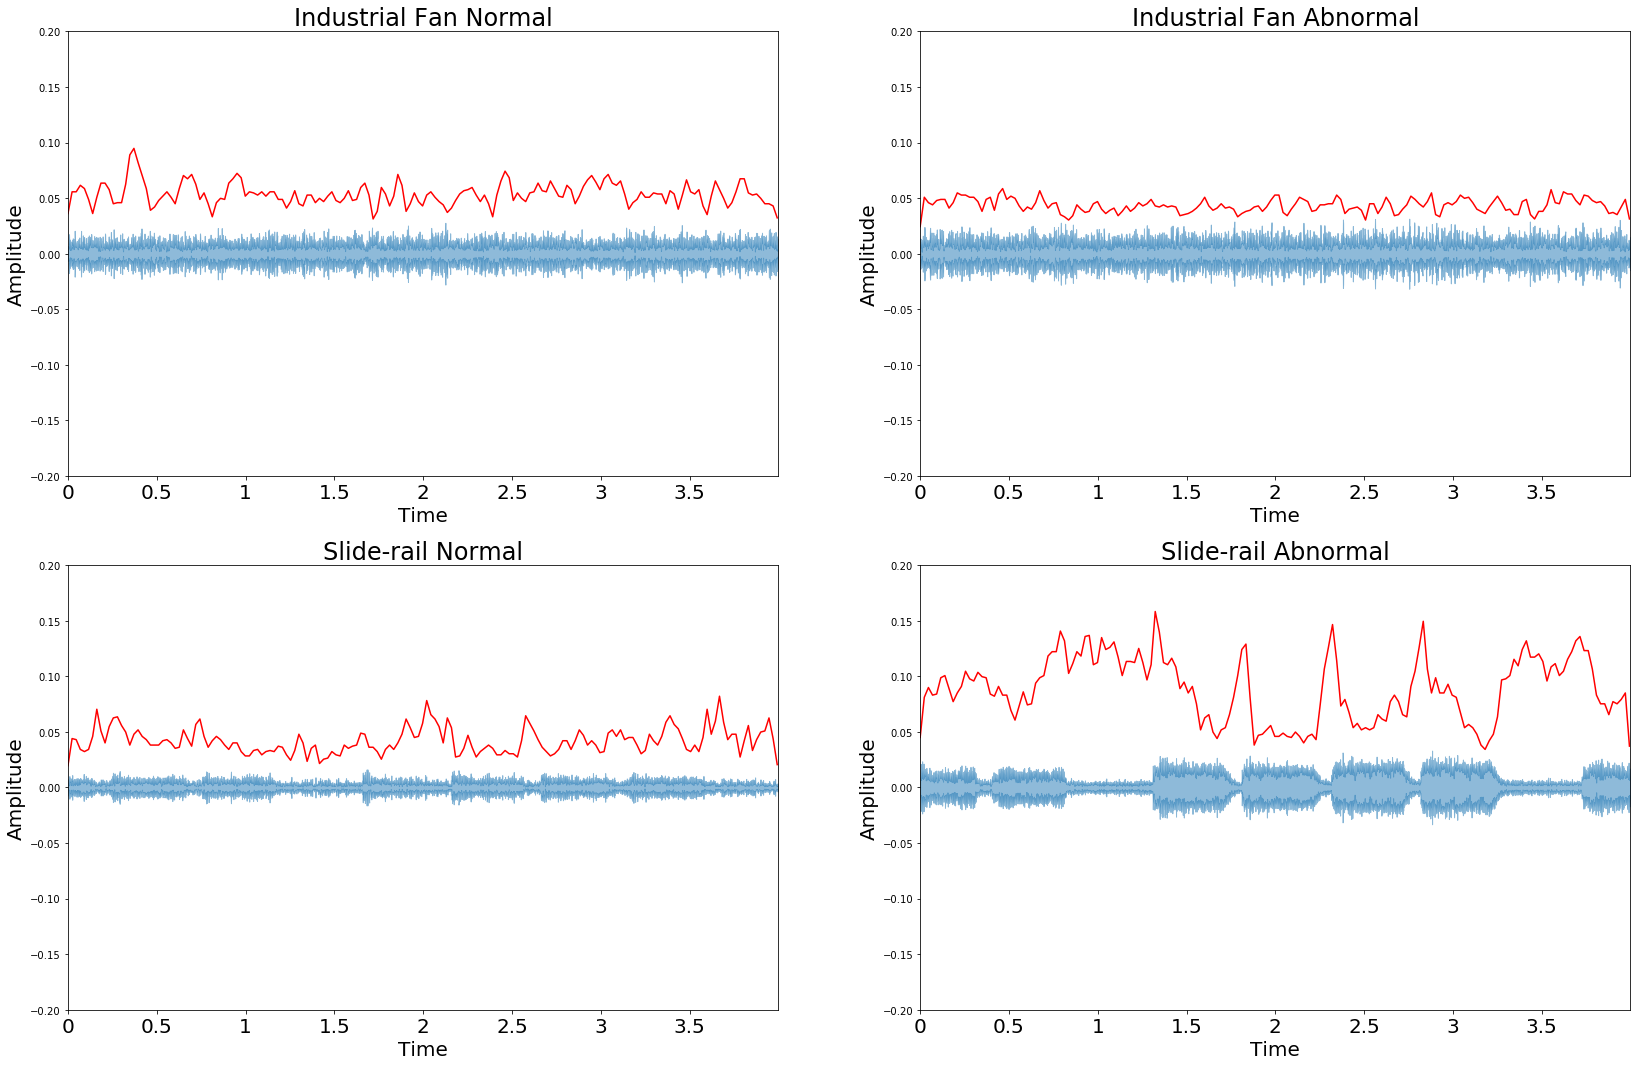

In [50]:
y_lim = 0.2

# Find ZCR for waveforms 
zcr_wfs = [librosa.feature.zero_crossing_rate(wf, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0] 
           for wf in wfs]

# Visualize the 4 waveforms
plt.figure(figsize=(28, 18))

for n in range(len(wfs)):
    plot_superimposed_waveforms(waveform=wfs[n], superimposed_waveform=zcr_wfs[n], 
                                title=titles[n], y_lim=y_lim, row=2, col=2, n_plot=n+1)

In [27]:
def plot_zcrplot(waveform=None, color='b'):
    frames = range(len(waveform))
    T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
    plt.plot(T, waveform, color=color, alpha=0.4)

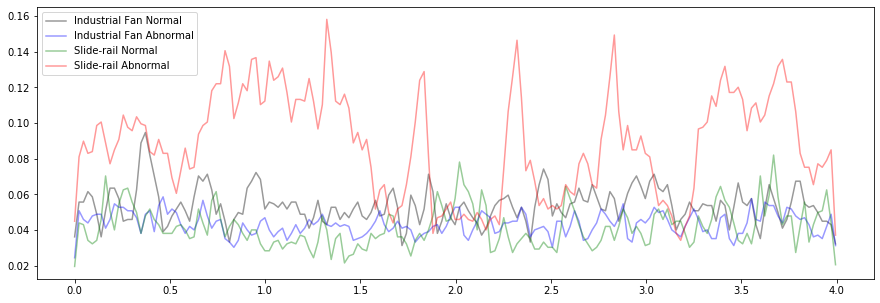

In [52]:
FRAME_SIZE = 1024
HOP_LENGHT = 512

# Visualize the 4 waveforms - superimosed all together
plt.figure(figsize=(15, 5))

plot_zcrplot(zcr_waveform1, color='k')
plot_zcrplot(zcr_waveform2, color='b')
plot_zcrplot(zcr_waveform3, color='g')
plot_zcrplot(zcr_waveform4, color='r')

plt.legend(titles, loc ="upper left")